In [1]:
import cv2
from bag_reader import READER
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Failed to load Python extension for LZ4 support. LZ4 compression will not be available.


In [2]:
data = READER('/home/nimibot/catkin_ws/src/ros_env_prediction/env_recorder_pkg/bag/2022-10-27-12-42-56.bag')
data.read()

[INFO]  Data folder /home/nimibot/catkin_ws/src/ros_env_prediction/env_recorder_pkg/bag/2022-10-27-12-42-56 already exists. Not creating.


In [69]:
disp = np.load(data.disparity_df.np_path[32])
#np.nan_to_num(disp,0)
print(disp)

[[       nan        nan        nan ... -37.008614 -37.081707 -37.081707]
 [       nan        nan        nan ... -36.88518  -37.008614 -37.09794 ]
 [       nan        nan        nan ... -36.881897 -36.98804  -37.09794 ]
 ...
 [       nan        nan        nan ... -41.766968 -41.870743 -41.968918]
 [       nan        nan        nan ... -41.766968 -41.883636 -41.967384]
 [       nan        nan        nan ... -41.774227 -41.927166 -42.01683 ]]


In [139]:
min_disp = data.disparity_df.min_disparity[0]
max_disp = data.disparity_df.max_disparity[0]
max_disp
multiplier = 255/(max_disp - min_disp)
print(multiplier)

3.4934184210158947


[[  0   0   0 ... 134 134 134]
 [  0   0   0 ... 135 134 134]
 [  0   0   0 ... 135 135 134]
 ...
 [  0   0   0 ... 118 117 117]
 [  0   0   0 ... 118 117 117]
 [  0   0   0 ... 118 117 117]]


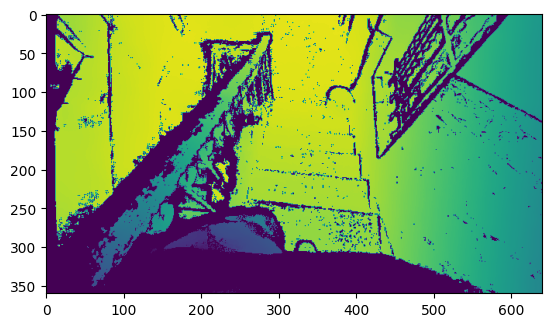

In [146]:
disp_cv = disp.copy()
scaledDisparity = (disp_cv - min_disp)*multiplier 
# if np.max(scaledDisparity) > 0:
#      scaledDisparity = scaledDisparity * (255/np.max(scaledDisparity))
scaledDisparity = np.clip(scaledDisparity,0,255)


scaledDisparity = scaledDisparity.astype(np.uint8)
print(scaledDisparity)
cv2.imwrite("asd.jpg",scaledDisparity)

plt.imshow(scaledDisparity)

[[[  0   0 128]
  [  0   0 128]
  [  0   0 128]
  ...
  [154 255 102]
  [154 255 102]
  [154 255 102]]

 [[  0   0 128]
  [  0   0 128]
  [  0   0 128]
  ...
  [158 255  98]
  [154 255 102]
  [154 255 102]]

 [[  0   0 128]
  [  0   0 128]
  [  0   0 128]
  ...
  [158 255  98]
  [158 255  98]
  [154 255 102]]

 ...

 [[  0   0 128]
  [  0   0 128]
  [  0   0 128]
  ...
  [ 90 255 166]
  [ 86 255 170]
  [ 86 255 170]]

 [[  0   0 128]
  [  0   0 128]
  [  0   0 128]
  ...
  [ 90 255 166]
  [ 86 255 170]
  [ 86 255 170]]

 [[  0   0 128]
  [  0   0 128]
  [  0   0 128]
  ...
  [ 90 255 166]
  [ 86 255 170]
  [ 86 255 170]]]


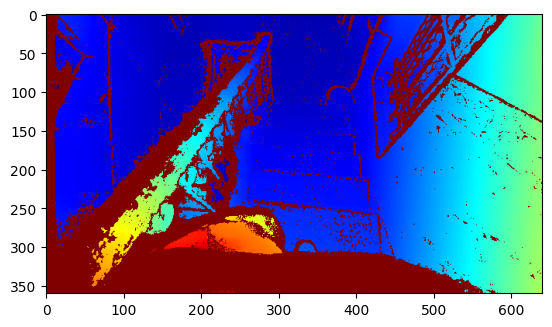

In [145]:
heat = cv2.applyColorMap(scaledDisparity,cv2.COLORMAP_JET)
plt.imshow(heat)
heat = cv2.cvtColor(heat, cv2.COLOR_BGR2RGB)
cv2.imwrite("asd.jpg",heat)
print(heat)

